# **Wahoot!**

## **The xSoc Python Course Project**
#### *Created by Tomas ([Warwick AI]()) and Keegan ([Computing](https://go.uwcs.uk/links))*

## An Introduction

Wahoot is a [*completely original idea*](https://kahoot.com/student-centered-learning/) that *definitely doesn't already exist*, where players compete in multiple choice, timed quizzes to gain the highest score. 

You gain more points the faster you answer a question, and also get bonus points for answering consecutive questions correctly (called a streak). At the end, we get to see who won! It's also possible to make your own quizzes, with custom questions and answers.

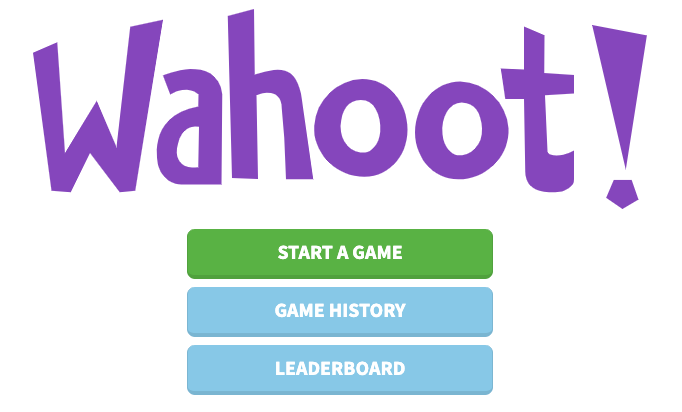

Sounds cool, right? Now all we have to do is implement it!

Obviously we're not asking you to implement the networking or website stuff, that would take a lot longer to learn, so we've handled all of that for you already - you'll hopefully be able to see it in action by Week 4. What you will be doing is implementing the logic behind how the game operates, such as: player information, scoreboards, match histories, and more! Let's get started with our first Wahoot task.

# Wahoot Project: Scoring & Storing

This week, we'd like you to do two things, which are closely related. Firstly, to implement Wahoot's scoring system. Secondly, to store information that we can use later to show some end-of-game statistics! This will all be done through a single function, `apply_scoring()` - which updates a player's info based on their response to a given question.

But, we're not going to implement it all at once. There was a previous version of this notebook where we did try to do that, and people got very confused. Instead, we're going to split the `apply_scoring()` function into 3 smaller, more manageable functions: tallying, streaks, and the question score. Finally, we'll tie it all back together. Sound good? Let's get going.

## Tallying

One of the first things we'd like to keep track of is the number of questions we've answered so far, and the number of questions we've answered correctly. To help with this let's introduce the `outcome` variable, which will be passed to both our tallying and streaks function.

`outcome` is a string representing how the player responded to the question. It can take the following values:

| `outcome` | Description |
|--|--|
| `"Correct"` | Player gave the correct answer for this question |
| `"Wrong"` | Player gave the wrong answer for this question |
| `"Timeout"` | Player did not give an answer, as they ran out of time |

With this information on a per-question basis, we can write a function to update the current tallies!

> **Task 1**: Implement the `update_tally()` function, which, depending on the outcome of a question, updates the number of questions answered, and answered correctly - before returning them both.

*Note: to return two values from a function, we can just separate them by a comma.*

In [ ]:
def update_tally(outcome: str, num_answered: int, num_correct: int) -> tuple[int, int]:
    # There are three cases to match: "Correct", "Wrong", and "Timeout".
    
    num_answered += 1

    # Make sure to update these variables above before returning them!
    return num_answered, num_correct

## Streaks

When a player answers a question, we also need to update their 'streaks'. For our quiz game, we calculate:
- ***Current Streak:*** The current number of correctly answered questions in a row. In other words, this will increase by 1 when a correct answer is given, but if given a wrong answer or a timeout, will reset to 0.

- ***Max Streak:*** Set to the highest value the current streak has been throughout the quiz, so far.

> **Task 2**: Implement the `update_streaks()` function, which, depending on whether a player answered a question correctly, changes and returns the values of both the current streak and max streak.

In [ ]:
def update_streaks(outcome: str, curr_streak: int, max_streak: int) -> tuple[int, int]:
    # What happens if we're correct?
    # What happens if we're wrong, or timeout?
    # Don't forget to update the max_streak.
    
    # Make sure to update these above before returning them!
    return curr_streak, max_streak

## Question Score

When the player gives a correct answer to a question, we'll need to calculate how many points they get for it. 

The **Question Score** is the sum of the **Time Score** and the **Streak Score**:

- ***Time Score:*** When a question begins, players have 20 seconds to answer it, and we keep track of the timings. `secs_left` is a float that can have any value between `0.0` and `20.0`, and represents the number of seconds remaining on the timer when the player answered the question. Submitting with `20.0` seconds left should give a maximum score of **1000** points, whereas submitting with `0.0` seconds left would give **0** points. In other words, the time score should decrease (linearly) over time.


- ***Streak score:*** This is one of the reasons why we implemented the previous function. This bonus score kicks in when the player has a streak of 2 with **200** points, and then increases by an additional **+200** points for each streak value past that. 3 in a row? **400** points. 4 in a row? **600** points. 5 in a row? **800** points. The pattern continues.

> **Task 3**: Implement the `streak_score()`, `time_score()` and `question_score()` functions in the cell below, to calculate the number of points gained when a player answers a question correctly.

In [ ]:
def streak_score(current_streak: int) -> int:
    # increases by 200 pts each time after 2+ streak
    # 1: 0, 2: 200, 3: 400, 4: 600, 5: 800, ...

    return 0

def time_score(secs_left: float) -> int:
    # 1000 pts at 20.0 secs, 0 pts at 0.0 secs
    # Should decreases at the same rate to 0 over time.

    return 0

def question_score(secs_left: float, current_streak: int) -> int:
    # The combined time and streak scores.
    # Make sure this is an integer!

    return 0

## Putting it all together

Alright, you've basically implemented all the functionality we're going to need. Now we just need to combine it together.

In the actual Wahoot project, we'll be grouping related variables into things called 'Classes'. Don't worry too much about the details, you'll learn more about classes in Week 5. For now, just know that it just makes it a bit easier for us to keep track of things. The code for the player class looks like this:

In [ ]:
# Don't worry too much about what a 'class' is for now.
# Think of it as a way to group related data.
class Player:
    def __init__(self):
        self.score: int = 0
        
        self.num_answered: int = 0
        self.num_correct: int = 0
        self.current_streak: int = 0
        self.max_streak: int = 0

And in practice, it lets us use a single variable to refer to all of the grouped variables. We just create an 'instance' of the class, and can then reference any of the grouped variables by using the dot `.` notation like so:

In [ ]:
player = Player()  # Create instance of Player class

print(player.score)  # 'Initialised' to 0

player.num_answered += 1
player.score += 543

print(player.score, player.num_answered)  # Works like normal!

You might have be able to work this out above, but we'll list the other variables contained within the Player class. They'll be stored in the `player` variable, and be accessible through something like `player.var_name_here`:

| `player.[var_name_here]` | Datatype | Description |
|--|--|--|
| `score` | `int` | The player's total score so far in the quiz |
| `num_answered` | `int` | The number of questions the player has answered |
| `num_correct` | `int` | The number of questions the player has answered correctly |
| `current_streak` | `int` | The number of questions answered correctly in a row |
| `max_streak` | `int` | The maximum number of questions answered correctly in a row |

For the final task, we'll pass in the *player* variable, instead of each of the individual components of it.

> **Final Task**: Implement the Wahoot `apply_scoring()` function. You can use all the previous functions.
> 
> To check you've implemented things correctly, we have tests! You can scroll down a bit and run them. 

In [ ]:
def apply_scoring(player: Player, outcome: str, secs_left: float) -> int:
    """
    Updates player information based on a question's outcome and seconds remaining.
    Returns the points gained for this question.
    """

    # I've slotted in the first function from earlier for you
    player.num_answered, player.num_correct = update_tally(outcome, player.num_answered, player.num_correct)

    # The update_streaks() one is very similar...
    player.current_streak, player.max_streak = 0, 0

    # All we need to do now is update the total player.score,
    # and return the number of points gained for the answer given.

    return 0

Note: Just below this text are a few very long, hidden functions that define what it means to run tests on your `apply_scoring()` method. I wouldn't recommend unhiding this, but I'm also not going to stop you.

In [ ]:
def run_tests():
    print("--- Correct Only ---")
    if test_correct():
        print("\033[1;32mTest passed :)\033[0;0m")
    print("--- Wrong/Timeout Only ---")
    if test_wrong_timeout():
        print("\033[1;32mTest passed :)\033[0;0m")
    print("--- Mixed Test ---")
    if test_mixed():
        print("\033[1;32mTest passed :)\033[0;0m")

def test_correct() -> bool:
    """
    This test only consists of correct outcomes.
    """
    good = True
    player = Player()
    
    q1_score = apply_scoring(player, "Correct", 16.86)  # Should be 843 + 0   = 843
    good &= check("Q1 Score", 843, q1_score)

    q2_score = apply_scoring(player, "Correct", 5.44)  # Should be 272 + 200 = 472
    good &= check("Q2 Score", 472, q2_score)
    good &= check("Q2 Streak", 2, player.current_streak)

    q3_score = apply_scoring(player, "Correct", 10.0)  # Should be 500 + 400 = 900
    good &= check("Q3 Score", 900, q3_score)
    
    good &= check("Final Score", 2215, player.score)
    good &= check("Final # Answered", 3, player.num_answered)
    good &= check("Final # Correct", 3, player.num_correct)
    good &= check("Final Streak", 3, player.current_streak)
    good &= check("Final Max Streak", 3, player.max_streak)

    return good
    
def test_wrong_timeout() -> bool:
    """
    This test only consists of wrong/timeout outcomes.
    """
    good = True
    player = Player()

    q1_score = apply_scoring(player, "Wrong", 4.25)  # Wrong
    good &= check("Q1 Score", 0, q1_score)
    good &= check("Q1 Streak", 0, player.current_streak)

    q2_score = apply_scoring(player, "Timeout", 0.0)  # Timeout
    good &= check("Q2 Score", 0, q2_score)

    q3_score = apply_scoring(player, "Wrong", 13.75)  # Wrong
    good &= check("Q3 Score", 0, q3_score)

    good &= check("Final Score", 0, player.score)
    good &= check("Final # Answered", 2, player.num_answered)
    good &= check("Final # Correct", 0, player.num_correct)
    good &= check("Final Streak", 0, player.current_streak)
    good &= check("Final Max Streak", 0, player.max_streak)
    return good

def test_mixed() -> bool:
    """
    This test consists of a mixture of outcome types.
    """
    good = True
    player = Player()

    q1_score = apply_scoring(player, "Correct", 16.48)  # Correct, 824 + 0   = 824
    good &= check("Q1 Score", 824, q1_score)

    q2_score = apply_scoring(player, "Wrong", 13.89)  # Wrong
    good &= check("Q2 Score", 0, q2_score)
    good &= check("Q2 Streak", 0, player.current_streak)

    q3_score = apply_scoring(player, "Correct", 7.42)  # Correct, 371 + 0   = 371
    good &= check("Q3 Score", 371, q3_score)

    q4_score = apply_scoring(player, "Correct", 0.04)  # Correct, 2   + 200 = 202
    good &= check("Q4 Score", 202, q4_score)

    q5_score = apply_scoring(player, "Timeout", 0.0)  # Timeout
    good &= check("Q5 Score", 0, q5_score)
    good &= check("Q5 Streak", 0, player.current_streak)

    q6_score = apply_scoring(player, "Correct", 19.5)  # Correct, 975 + 0   = 975
    good &= check("Q6 Score", 975, q6_score)
    good &= check("Q6 Streak", 1, player.current_streak)
    good &= check("Q6 Max Streak", 2, player.max_streak)

    q7_score = apply_scoring(player, "Correct", 8.44)  # Correct, 422 + 200 = 622
    good &= check("Q7 Score", 622, q7_score)

    q8_score = apply_scoring(player, "Correct", 5.86)  # Correct, 293 + 400 = 693
    good &= check("Q8 Score", 693, q8_score)

    q9_score = apply_scoring(player, "Wrong", 9.99)  # Wrong
    good &= check("Q9 Score", 0, q9_score)
    good &= check("Q9 Streak", 0, player.current_streak)
    
    q10_score = apply_scoring(player, "Timeout", 0.0)  # Timeout
    good &= check("Q10 Score", 0, q10_score)

    good &= check("Final Score", 3687, player.score)
    good &= check("Final # Answered", 8, player.num_answered)
    good &= check("Final # Correct", 6, player.num_correct)
    good &= check("Final Streak", 0, player.current_streak)
    good &= check("Final Max Streak", 3, player.max_streak)
    return good

def check(name, expected, got) -> bool:
    if expected != got:
        print(f"\033[2;33m{name}: Expected {expected}, Got {got}\033[0;0m")
    return expected == got

And in the cell below this one, a function call to actually run those tests.

I'd recommend hitting the **Run All** button near the top of your screen, as everything's spread out across multiple cells. Jupyter will have only run the Python code you've hit play on, so if you've not hit play on a function, it might not 'exist', or might have an older version of your function definition saved.

In [ ]:
# Run tests on your apply_scoring function.
run_tests()

🖋️ ***(Re)-Written by Keegan from the [Computing Society](https://go.uwcs.uk/links)***